In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy


def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def setup_graph_zoom(title='', x_label='', y_label='', fig_size=None, x_1 = '', x_2 = '', y_1 = '', y_2 = ''):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlim(x_1, x_2)
    ax.set_ylim(y_1, y_2)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)   

T = 40
dt = 0.04
n = int(T/dt)
t = np.linspace(0, 40, num = n)
w = [(i*1.0/n)*dt for i in range(n//2+1)]
wmax = 40*dt/n
w = np.linspace(0,wmax,num = n//2+1)
data_freq = []

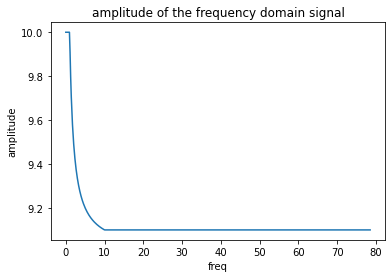

In [9]:
data_freq_RS = []
w = [(2*np.pi*i*1.0/n)/dt for i in range(n//2+1)]

C1 = 10 # Valore scelto a caso, forse ci va un qualcosa specifico
c = 1
for i in w:
    if i < 1:
        data_freq_RS.append(C1)
    if  i >= 1 and i < 10:
        data_freq_RS.append(c/i + C1 -c)
    if i >= 10:
        data_freq_RS.append(c/10 + C1 - c)

setup_graph(x_label='freq', y_label='amplitude', title='amplitude of the frequency domain signal')
plt.plot(w,data_freq_RS)

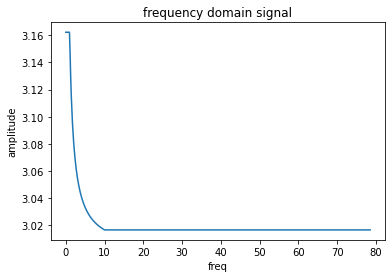

In [10]:
data_freq_RS = []
w = [(2*np.pi*i*1.0/n)/dt for i in range(n//2+1)]

C1 = 10 # Valore scelto a caso, forse ci va un qualcosa specifico
c = 1
for i in w:
    if i < 1:
        data_freq_RS.append(np.sqrt(C1))
    if  i >= 1 and i < 10:
        data_freq_RS.append(np.sqrt(c/i + C1 -c))
    if i >= 10:
        data_freq_RS.append(np.sqrt(c/10 + C1 - c))

setup_graph(x_label='freq', y_label='amplitude', title='frequency domain signal')
plt.plot(w,data_freq_RS)

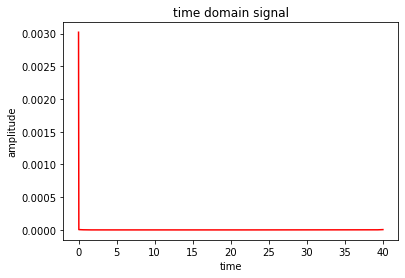

In [11]:
data_t_RS = np.fft.irfft(data_freq_RS)
magnitude_RS = [np.sqrt(i.real**2 + i.imag**2)/len(data_t_RS) for i in data_t_RS]
setup_graph(x_label='time', y_label='amplitude', title='time domain signal')
#plt.plot(t, data_t_RS, 'r')
plt.plot(t, magnitude_RS, 'r')

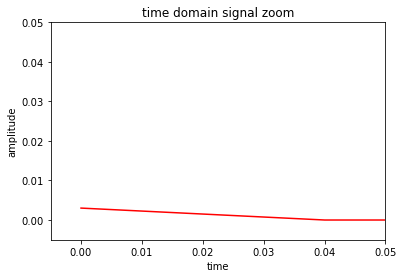

In [12]:
setup_graph_zoom(x_label='time', y_label='amplitude', title='time domain signal zoom', x_1 = -.005, x_2 = .05, y_1 = -.005, y_2 = .05)
plt.plot(t, magnitude_RS, 'r')

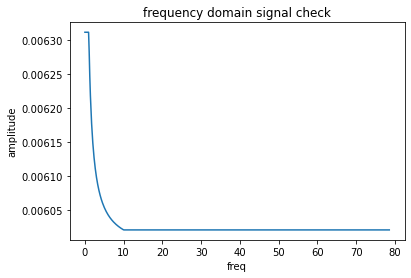

In [13]:
check_RS = np.fft.rfft(data_t_RS)
magnitude_check_RS = [np.sqrt(i.real**2 + i.imag**2)/len(check_RS) for i in check_RS]
setup_graph(x_label='freq', y_label='amplitude', title='frequency domain signal check')
_ = plt.plot(w, magnitude_check_RS)
#_ = plt.plot(w, check_RS.imag)

## RUMORE CH 1

Aggiungo il rumore allo spettro in frequenza 

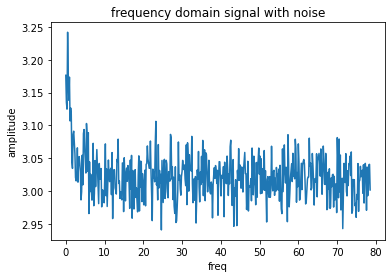

In [42]:
data_freq_RS1 = np.array(data_freq_RS)
noise_RS1 = np.random.normal(0, 0.03, data_freq_RS1.shape)
data_w_noise_RS1 = data_freq_RS1 + noise_RS1
setup_graph(x_label='freq', y_label='amplitude', title='frequency domain signal with noise')

plt.plot(w,data_w_noise_RS1)

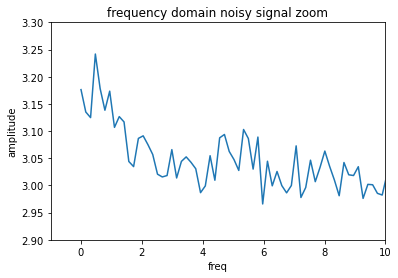

In [102]:
setup_graph_zoom(x_label='freq', y_label='amplitude', title='frequency domain noisy signal zoom', x_1 = -1, x_2 = 10, y_1 = 2.9, y_2 = 3.3)
plt.plot(w, data_w_noise_RS1)

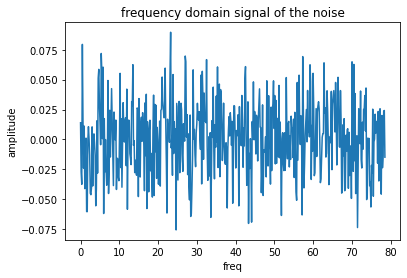

In [44]:
setup_graph(x_label='freq', y_label='amplitude', title='frequency domain signal of the noise')
plt.plot(w, noise_RS1)

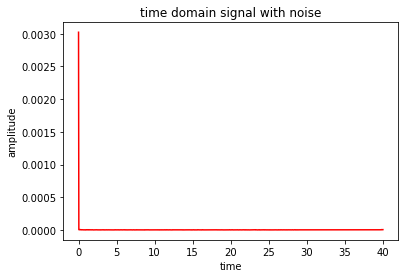

In [45]:
data_t_noise_RS1 = np.fft.irfft(data_w_noise_RS1)
magnitude__noise_RS1 = [np.sqrt(i.real**2 + i.imag**2)/len(data_t_noise_RS1) for i in data_t_noise_RS1]
setup_graph(x_label='time', y_label='amplitude', title='time domain signal with noise')
plt.plot(t, magnitude__noise_RS1, 'r')

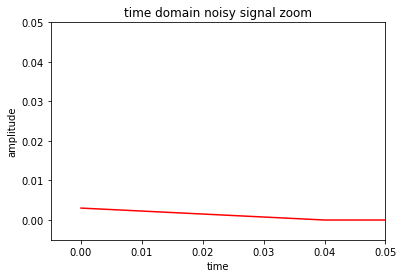

In [46]:
setup_graph_zoom(x_label='time', y_label='amplitude', title='time domain noisy signal zoom', x_1 = -.005, x_2 = .05, y_1 = -.005, y_2 = .05)
plt.plot(t, magnitude__noise_RS1, 'r')

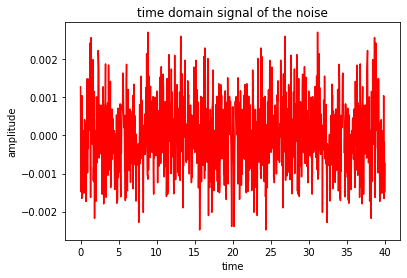

In [47]:
t_noise_RS1 = np.fft.irfft(noise_RS1)
setup_graph(x_label='time', y_label='amplitude', title='time domain signal of the noise')
plt.plot(t, t_noise_RS1, 'r')

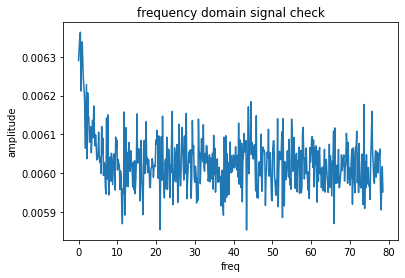

In [33]:
check_RS = np.fft.rfft(data_t_noise_RS)
magnitude_check_RS = [np.sqrt(i.real**2 + i.imag**2)/len(check_RS) for i in check_RS]
setup_graph(x_label='freq', y_label='amplitude', title='frequency domain signal check')
_ = plt.plot(w, magnitude_check_RS)

## RUMORE CH 2

Aggiungo il rumore al segnale temporale

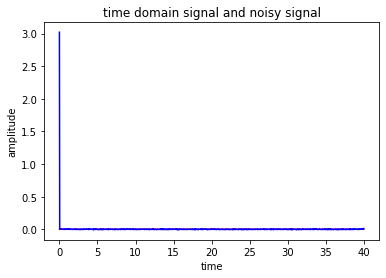

In [48]:
data_t_RS2 = np.fft.irfft(data_freq_RS)
magnitude_RS2 = [np.sqrt(i.real**2 + i.imag**2)/len(data_t_RS2) for i in data_t_RS2]
setup_graph(x_label='time', y_label='amplitude', title='time domain signal and noisy signal')
#plt.plot(t, data_t_RS, 'r')

data_t_RS2 = np.array(data_t_RS2)
noise_t_RS2 = np.random.normal(0, 0.003, data_t_RS2.shape)
data_t_noise_RS2 = data_t_RS2 + noise_t_RS2

plt.plot(t, magnitude_RS2, 'r')
plt.plot(t, data_t_noise_RS2, 'b')

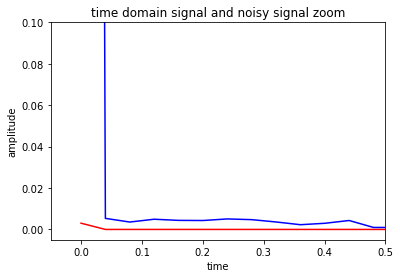

In [100]:
setup_graph_zoom(x_label='time', y_label='amplitude', title='time domain signal and noisy signal zoom', x_1 = -.05, x_2 = .5, y_1 = -.005, y_2 = .1)
plt.plot(t, magnitude_RS, 'r')
plt.plot(t, data_t_noise_RS, 'b')

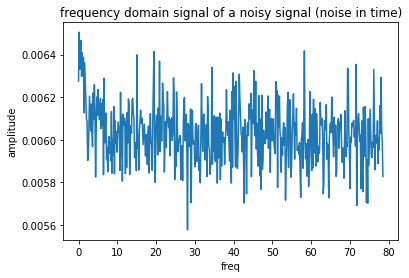

In [56]:
back2w_RS = np.fft.rfft(data_t_noise_RS2)
magnitude_back2w_RS = [np.sqrt(i.real**2 + i.imag**2)/len(back2w_RS) for i in back2w_RS]
setup_graph(x_label='freq', y_label='amplitude', title='frequency domain signal of a noisy signal (noise in time)')
_ = plt.plot(w, magnitude_back2w_RS)

## CONVOLUZIONE

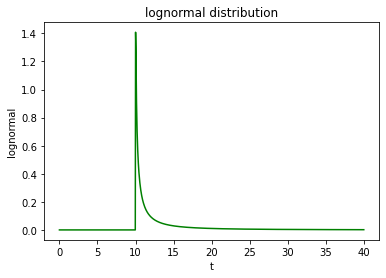

In [104]:
from scipy import signal
from scipy.stats import lognorm  

mu, sigma = 2.2, .91
log_norm = lognorm.pdf(t, 2, 10)

setup_graph(x_label='t', y_label='lognormal', title='lognormal distribution')
plt.plot(t,log_norm, 'g')

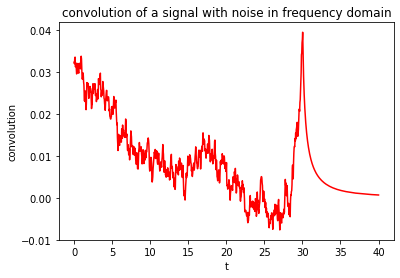

In [105]:
conv1 = signal.convolve(data_t_noise_RS1, log_norm, mode = 'same')

setup_graph(x_label='t', y_label='convolution', title='convolution of a signal with noise in frequency domain')
plt.plot(t, conv1, 'r')

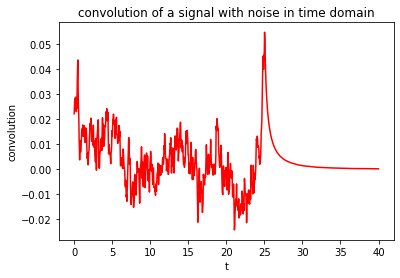

In [96]:
conv2 = signal.convolve(data_t_noise_RS2, log_norm, mode = 'same')

setup_graph(x_label='t', y_label='convolution', title='convolution of a signal with noise in time domain')
plt.plot(t, conv2, 'r')